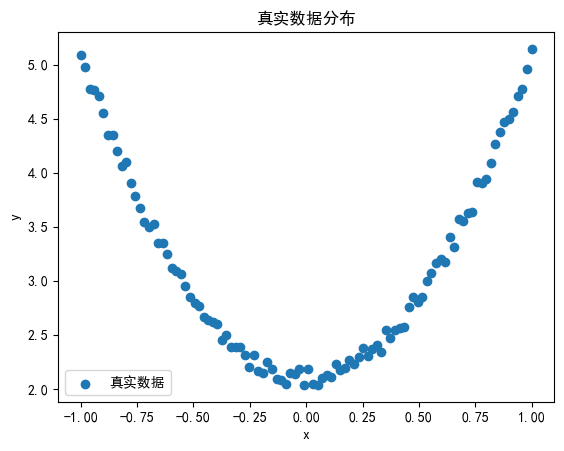

Iteration 1, 权重梯度: -267.2400817871094, 偏置梯度: -623.0146484375
Iteration 2, 权重梯度: -213.7423095703125, 偏置梯度: -480.2357177734375
Iteration 3, 权重梯度: -172.18235778808594, 偏置梯度: -369.6512145996094
Iteration 4, 权重梯度: -139.87368774414062, 偏置梯度: -284.01025390625
Iteration 5, 权重梯度: -114.734619140625, 偏置梯度: -217.69488525390625
Iteration 6, 权重梯度: -95.15238952636719, 偏置梯度: -166.3524169921875
Iteration 7, 权重梯度: -79.87728881835938, 偏置梯度: -126.61029052734375
Iteration 8, 权重梯度: -67.9410400390625, 偏置梯度: -95.85551452636719
Iteration 9, 权重梯度: -58.59339904785156, 偏置梯度: -72.06351470947266
Iteration 10, 权重梯度: -51.253055572509766, 偏置梯度: -53.66569137573242
Iteration 11, 权重梯度: -45.46955108642578, 偏置梯度: -39.4466552734375
Iteration 12, 权重梯度: -40.893890380859375, 偏置梯度: -28.464794158935547
Iteration 13, 权重梯度: -37.25562286376953, 偏置梯度: -19.990509033203125
Iteration 14, 权重梯度: -34.34516525268555, 偏置梯度: -13.45853042602539
Iteration 15, 权重梯度: -32.0001220703125, 偏置梯度: -8.430896759033203
Iteration 16, 权重梯度: -30.09463882446

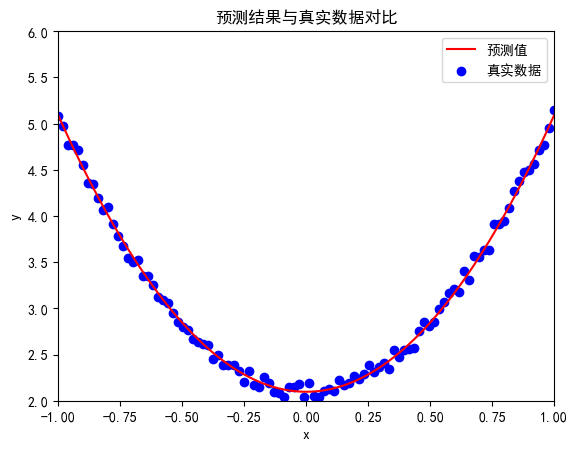

最终权重: tensor([[2.9935]])
最终偏置: tensor([[2.0971]])


In [18]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib import rcParams

# 设置中文字体，防止乱码
rcParams['font.sans-serif'] = ['SimHei']  # 选择支持中文的字体，例如SimHei
rcParams['axes.unicode_minus'] = False  # 显示负号

# 生成输入数据x及目标数据y
np.random.seed(206)  # 设置随机种子，确保结果可重复
x = np.linspace(-1, 1, 100).reshape(100, 1)  # 生成从-1到1的100个均匀分布的数据点
y = 3 * np.power(x, 2) + 2 + 0.2 * np.random.rand(x.size).reshape(100, 1)  # 生成目标数据y，包括一定的随机噪声

# 将numpy数组转换为torch张量
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 查看x、y数据分布情况
plt.scatter(x.numpy(), y.numpy(), label='真实数据')  # 将torch张量转换为numpy数组用于绘图
plt.xlabel('x')  # x轴标签
plt.ylabel('y')  # y轴标签
plt.title('真实数据分布')  # 图表标题
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 初始化权重参数
w1 = torch.zeros(1, 1, requires_grad=True)  # 初始化权重w1
b1 = torch.zeros(1, 1, requires_grad=True)  # 初始化偏置b1

# 训练模型
lr = 0.001  # 学习率，决定每次更新的步长
cost = []  # 用于存储每次迭代的损失值

for i in range(800):  # 进行800次迭代
    y_pred = w1 * x ** 2 + b1  # 使用当前权重和偏置计算预测值
    
    loss = torch.sum((y_pred - y) ** 2)  # 计算损失函数，这里使用均方误差
    loss.backward()  # 反向传播计算梯度
    
    # 参数更新
    with torch.no_grad():  # 禁用梯度计算
        w1 -= lr * w1.grad  # 使用梯度下降法更新权重
        b1 -= lr * b1.grad  # 使用梯度下降法更新偏置
        
        # 打印当前梯度
        print(f'Iteration {i+1}, 权重梯度: {w1.grad.data.item()}, 偏置梯度: {b1.grad.data.item()}')
        
        w1.grad.zero_()  # 梯度清零
        b1.grad.zero_()  # 梯度清零

# 可视化结果
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='预测值')  # 使用红色线条展示预测结果
plt.scatter(x.numpy(), y.numpy(), color='blue', marker='o', label='真实数据')  # 使用蓝色散点展示真实数据
plt.xlabel('x')  # x轴标签
plt.ylabel('y')  # y轴标签
plt.title('预测结果与真实数据对比')  # 图表标题
plt.xlim(-1, 1)  # 设置x轴范围
plt.ylim(2, 6)  # 设置y轴范围
plt.legend()  # 显示图例
plt.show()  # 显示图表

# 打印最终的权重和偏置
print('最终权重:', w1.data)
print('最终偏置:', b1.data)


In [19]:
import torch.nn as nn

# 定义卷积层
conv1 = nn.Conv1d(in_channels=256, out_channels=100, kernel_size=2)

# 创建输入数据
input = torch.randn(32, 35, 256)

# 调整输入数据的形状
input = input.permute(0, 2, 1)

# 应用卷积层
output = conv1(input)

# 打印输入和输出的形状
print("Input shape:", input.shape)  # 应该是 (32, 256, 35)
print("Output shape:", output.shape)  # 应该是 (32, 100, 34)


Input shape: torch.Size([32, 256, 35])
Output shape: torch.Size([32, 100, 34])


In [26]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

# 创建 ToTensor 和 ToPILImage 实例
to_tensor = ToTensor()  # PIL Image -> Tensor
to_pil = ToPILImage()  # Tensor -> PIL Image

# 打开图像文件
lena = Image.open('imgs/cat.jpg')

# 将 PIL 图像转换为 Tensor
input_tensor = to_tensor(lena).unsqueeze(0)  # 添加批量维度

# 将 Tensor 转回 PIL 图像
output_image = to_pil(input_tensor.squeeze(0))  # 去除批量维度

# 显示转换后的图像（可选）
output_image.show()


In [29]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage

# 加载并转换图像
lena = Image.open('imgs/cat.jpg')
to_tensor = ToTensor()
to_pil = ToPILImage()

# 将 PIL 图像转换为 Tensor
input_tensor = to_tensor(lena)

# 增加亮度
brighter_tensor = input_tensor * 1.3  # 增加亮度（乘以一个系数）

# 限制数值范围在 [0, 1]
brighter_tensor = brighter_tensor.clamp(0, 1)

# 转回 PIL 图像并显示
output_image = to_pil(brighter_tensor)
output_image.show()


In [34]:
# 创建随机输入张量（既有正数也有负数）
input = torch.randn(4, 4)
print("Input:\n", input)
# 使用 ReLU 激活函数
relu = nn.ReLU(inplace=True)
output_relu = relu(input)
print("Input:\n", input)
print("Output (ReLU):\n", output_relu)


Input:
 tensor([[ 1.2412,  0.6293,  0.3492,  0.8099],
        [ 0.3065,  1.5283,  2.5024,  1.2143],
        [ 0.5684,  0.9501,  0.5672, -0.5998],
        [ 0.9040,  0.6576,  1.9610, -0.8729]])
Input:
 tensor([[1.2412, 0.6293, 0.3492, 0.8099],
        [0.3065, 1.5283, 2.5024, 1.2143],
        [0.5684, 0.9501, 0.5672, 0.0000],
        [0.9040, 0.6576, 1.9610, 0.0000]])
Output (ReLU):
 tensor([[1.2412, 0.6293, 0.3492, 0.8099],
        [0.3065, 1.5283, 2.5024, 1.2143],
        [0.5684, 0.9501, 0.5672, 0.0000],
        [0.9040, 0.6576, 1.9610, 0.0000]])


In [35]:
# 创建输入张量（例如 1 张 4x4 的图像，具有 1 个通道）
input = torch.randn(1, 1, 4, 4)

# 定义平均池化和最大池化层
pool1 = nn.AvgPool2d(2, 2)  # 平均池化
pool2 = nn.MaxPool2d(2, 2)  # 最大池化

# 应用平均池化
out_avg = pool1(input)

# 应用最大池化
out_max = pool2(input)

print("Input:\n", input)
print("Output (AvgPool2d):\n", out_avg)
print("Output (MaxPool2d):\n", out_max)


Input:
 tensor([[[[ 1.5517,  0.3054,  1.1113,  0.7262],
          [ 1.3110,  0.2634, -0.3807,  1.7217],
          [ 0.2435, -0.7346, -0.3345, -0.0377],
          [ 0.3615, -1.1133,  0.0848,  0.9705]]]])
Output (AvgPool2d):
 tensor([[[[ 0.8579,  0.7946],
          [-0.3107,  0.1708]]]])
Output (MaxPool2d):
 tensor([[[[1.5517, 1.7217],
          [0.3615, 0.9705]]]])


In [65]:
# 创建输入张量 (batch_size=2, input_features=3)
input = torch.randn(2, 3)

# 定义线性层 (input_features=3, output_features=4)
linear = nn.Linear(3, 4)

# 前向传播
h = linear(input)

# 打印输入和输出张量
print("Input:\n", input)
print("Output:\n", h)


Input:
 tensor([[-1.0520,  0.2707, -0.1476],
        [-1.3212,  0.7929, -1.5488]])
Output:
 tensor([[ 0.6107, -0.0357,  0.1838, -0.4500],
        [ 0.2217, -0.4301,  0.1279, -1.2936]], grad_fn=<AddmmBackward0>)


torch.Size([60000, 28, 28])
torch.Size([60000])


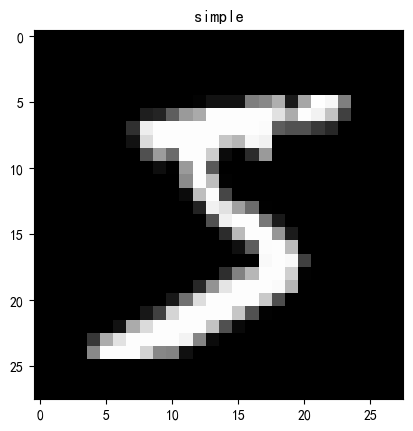

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


C:\Users\lzw00\AppData\Local\Temp\ipykernel_15424\1169737302.py:40: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_x = Variable(torch.unsqueeze(test_data.data, dim=1),


Epoch: 0 |Step: 0 |train loss:2.3034 |test accuracy:0.1210
Epoch: 0 |Step: 100 |train loss:0.5555 |test accuracy:0.8680
Epoch: 0 |Step: 200 |train loss:0.1272 |test accuracy:0.9345
Epoch: 0 |Step: 300 |train loss:0.0559 |test accuracy:0.9495
Epoch: 0 |Step: 400 |train loss:0.0345 |test accuracy:0.9575
Epoch: 0 |Step: 500 |train loss:0.1839 |test accuracy:0.9665
Epoch: 0 |Step: 600 |train loss:0.0191 |test accuracy:0.9710
Epoch: 0 |Step: 700 |train loss:0.0962 |test accuracy:0.9660
Epoch: 0 |Step: 800 |train loss:0.0378 |test accuracy:0.9645
Epoch: 0 |Step: 900 |train loss:0.1014 |test accuracy:0.9765
Epoch: 0 |Step: 1000 |train loss:0.1946 |test accuracy:0.9775
Epoch: 0 |Step: 1100 |train loss:0.0199 |test accuracy:0.9770
[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


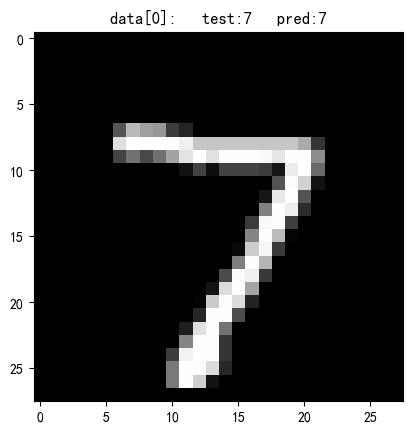

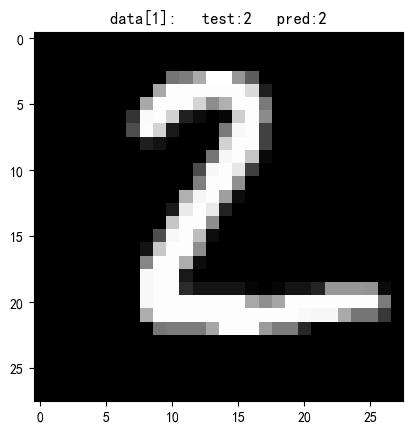

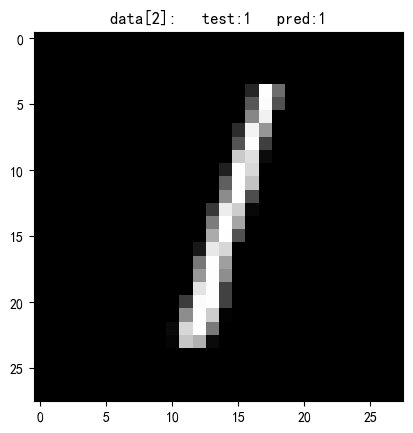

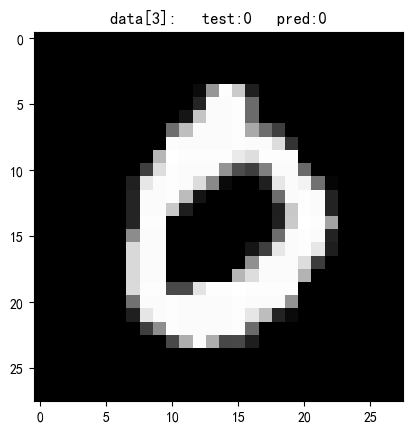

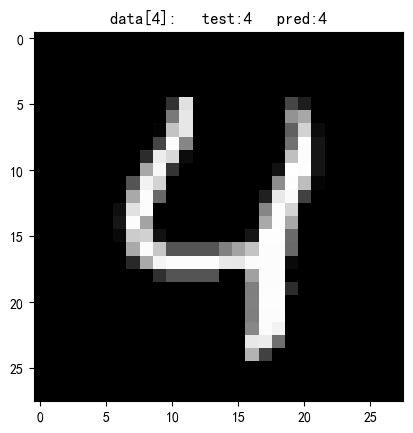

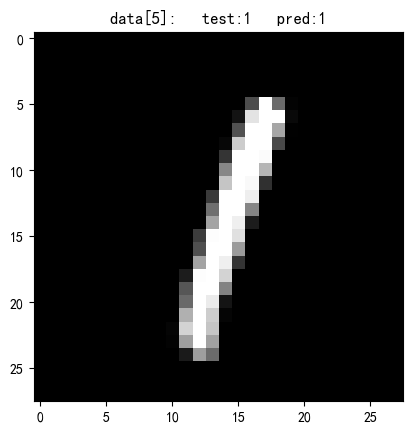

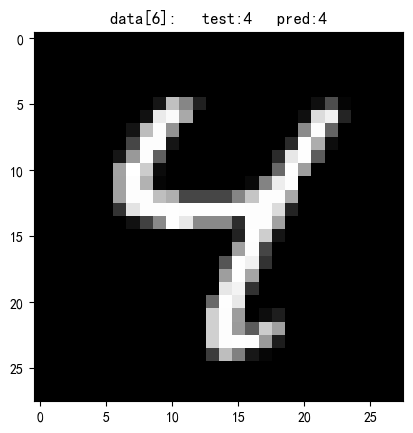

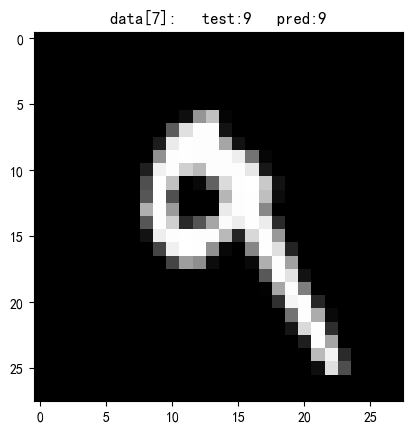

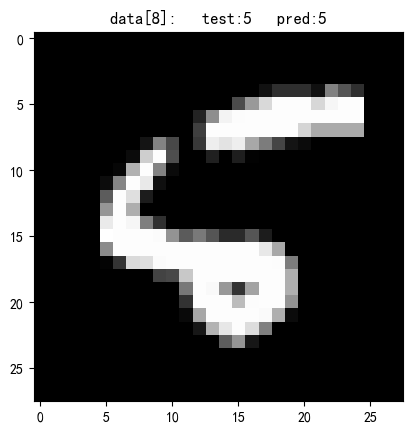

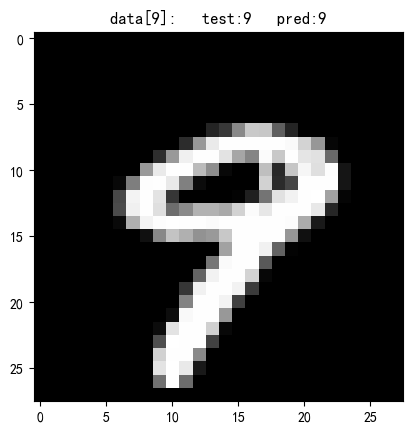

In [70]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

torch.manual_seed(1)

EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

# 获取训练集dataset
training_data = torchvision.datasets.MNIST(
    root='./data/',  # dataset存储路径
    train=True,  # True表示是train训练集，False表示test测试集
    transform=torchvision.transforms.ToTensor(),  # 将原数据规范化到（0,1）区间
    download=DOWNLOAD_MNIST,
)

# 打印MNIST数据集的训练集及测试集的尺寸
print(training_data.data.size())
print(training_data.targets.size())
# torch.Size([60000, 28, 28])
# torch.Size([60000])
plt.imshow(training_data.data[0].numpy(), cmap='gray')
plt.title('simple')
plt.show()

# 通过torchvision.datasets获取的dataset格式可直接可置于DataLoader
train_loader = Data.DataLoader(dataset=training_data, batch_size=BATCH_SIZE,
                               shuffle=True)

# 获取测试集dataset
test_data = torchvision.datasets.MNIST(root='./data/', train=False)
# 取前2000个测试集样本

test_x = Variable(torch.unsqueeze(test_data.data, dim=1),
                  volatile=True).type(torch.FloatTensor)[:2000] / 255
# (2000, 28, 28) to (2000, 1, 28, 28), in range(0,1)
test_y = test_data.targets[:2000]


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(  # (1,28,28)
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5,
                      stride=1, padding=2),  # (16,28,28)
            # 想要con2d卷积出来的图片尺寸没有变化, padding=(kernel_size-1)/2
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)  # (16,14,14)
        )
        self.conv2 = nn.Sequential(  # (16,14,14)
            nn.Conv2d(16, 32, 5, 1, 2),  # (32,14,14)
            nn.ReLU(),
            nn.MaxPool2d(2)  # (32,7,7)
        )
        self.out = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)  # 将（batch，32,7,7）展平为（batch，32*7*7）
        output = self.out(x)
        return output


cnn = CNN()
print(cnn)

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_function = nn.CrossEntropyLoss()

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)

        output = cnn(b_x)
        loss = loss_function(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if step % 100 == 0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            s1=sum(pred_y == test_y)
            s2=test_y.size(0)
            accuracy = s1/(s2*1.0)
            print('Epoch:', epoch, '|Step:', step,
                  '|train loss:%.4f' % loss.item(), '|test accuracy:%.4f' % accuracy)

test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')

for n in range(10):
    plt.imshow(test_data.data[n].numpy(), cmap='gray')
    plt.title('data[%i' % n+']:   test:%i' % test_data.targets[n]+'   pred:%i' % pred_y[n])
    plt.show()
